In [1]:
import os
import re
import operator
import sys
import csv
    
def path_discover():
    test_directory = "C:\\Users\\User\\Desktop\\ML\\Document_Catogorization\\category"
    directories = []
    for child in os.listdir(test_directory):
        test_path = os.path.join(test_directory, child)
        if os.path.isdir(test_path):
            directories.append(test_path)
        else:
            print(test_path)
        
    return directories;

In [2]:
directories = path_discover()
#print(directories)
#sys.exit() 
x_train = []
x_test = []
y_train = []
y_test = []
    
train_size = 500
test_size = 50
fmap = {}
classes = []
for directory in directories:
    #print(directory)
        
    tlist = directory.split("\\")
#   print(tlist)
    sol_path = ""
        
    lsiz = len(tlist)
    cls = tlist[lsiz-1]
    classes.append(cls)
        
    for i in range(lsiz):
        if i+2 == lsiz:
            sol_path += "sol"
                
        else:
            sol_path += tlist[i]
                
        if i+1 != lsiz :
            sol_path += "\\"
            
    print(sol_path)
    #sol_path += "\\link"
    #directory += "\\link"
        
    if not os.path.exists(sol_path):
        os.makedirs(sol_path)
        
    gmap = {}
        
        
    for it in range(train_size+test_size):
        inp_path = directory + "\\link" + str(it+1)
        out_path = sol_path + "\\link" + str(it+1)
        
        inp_path += ".txt"
        out_path += ".txt"
#       print(inp_path)
#       print(out_path)
            
        file = open(inp_path,"rb")
        writer = open(out_path,"wb")
        p = file.read()
#       print(p)
        uni = str(p,'utf-8')
#       print(uni)
        if(it < train_size):
            x_train.append(uni)
            y_train.append(cls)
        else:
            x_test.append(uni)
            y_test.append(cls)
    
print(classes)
size_train = len(x_train)
size_test = len(x_test)

C:\Users\User\Desktop\ML\Document_Catogorization\category\all.txt
C:\Users\User\Desktop\ML\Document_Catogorization\sol\accident
C:\Users\User\Desktop\ML\Document_Catogorization\sol\art
C:\Users\User\Desktop\ML\Document_Catogorization\sol\crime
C:\Users\User\Desktop\ML\Document_Catogorization\sol\economics
C:\Users\User\Desktop\ML\Document_Catogorization\sol\education
C:\Users\User\Desktop\ML\Document_Catogorization\sol\entertainment
C:\Users\User\Desktop\ML\Document_Catogorization\sol\environment
C:\Users\User\Desktop\ML\Document_Catogorization\sol\international
C:\Users\User\Desktop\ML\Document_Catogorization\sol\opinion
C:\Users\User\Desktop\ML\Document_Catogorization\sol\politics
C:\Users\User\Desktop\ML\Document_Catogorization\sol\science_tech
C:\Users\User\Desktop\ML\Document_Catogorization\sol\sports
['accident', 'art', 'crime', 'economics', 'education', 'entertainment', 'environment', 'international', 'opinion', 'politics', 'science_tech', 'sports']


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        See full source and example: 
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
    
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, with only tfidf')
    
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

In [5]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.1) 
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [6]:
print(tfidf_train)
print(tfidf_vectorizer.get_feature_names()[-10:])
feature_arr = tfidf_vectorizer.get_feature_names()
for i in range(10):
    val = tfidf_vectorizer.vocabulary_[feature_arr[i]]
    print(feature_arr[i] , " ----> " , val)

  (0, 11108)	0.471766593072
  (0, 9724)	0.228164686926
  (0, 14249)	0.0929809389956
  (0, 12154)	0.424227758229
  (0, 6882)	0.0979786085993
  (0, 11385)	0.141647579847
  (0, 11115)	0.454845704447
  (0, 10676)	0.0936413812329
  (0, 15040)	0.108592751591
  (0, 14741)	0.210820312851
  (0, 14242)	0.312520519536
  (0, 7496)	0.121952237784
  (0, 8121)	0.130954954767
  (0, 7021)	0.137772557013
  (0, 6564)	0.0928807329463
  (0, 7834)	0.19736897178
  (0, 6883)	0.19736897178
  (1, 6882)	0.344599654133
  (1, 15040)	0.0636550929751
  (1, 7496)	0.0714861804391
  (1, 12349)	0.331859173755
  (1, 14471)	0.291248806032
  (1, 12352)	0.126809209193
  (1, 10368)	0.170146420651
  (1, 9970)	0.10930305697
  :	:
  (5999, 7336)	0.396417325281
  (5999, 15531)	0.0876987585139
  (5999, 6184)	0.0747640379762
  (5999, 8949)	0.112590924444
  (5999, 10016)	0.139831236377
  (5999, 15134)	0.115965833531
  (5999, 16636)	0.112590924444
  (5999, 13449)	0.101324714295
  (5999, 10961)	0.108964014874
  (5999, 15737)	0.126027

accuracy:   0.820
Confusion matrix, with only tfidf


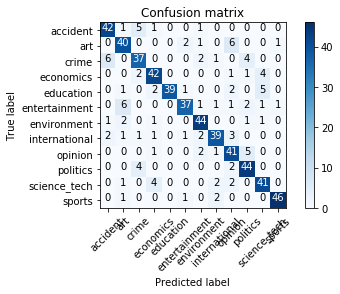

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
    
clf_tree = MultinomialNB(alpha = 0.1) 
clf_tree.fit(tfidf_train, y_train)
pred_tree = clf_tree.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred_tree)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_tree, labels=classes)
plot_confusion_matrix(cm, classes=classes)

accuracy:   0.773
Confusion matrix, with only tfidf


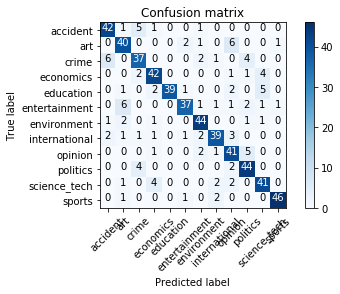

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier
pass_clf = PassiveAggressiveClassifier(max_iter=50 , random_state = 17)
pass_clf.fit(tfidf_train, y_train)
pred = pass_clf.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_tree, labels=classes)
plot_confusion_matrix(cm, classes=classes)

accuracy:   0.763
Confusion matrix, with only tfidf


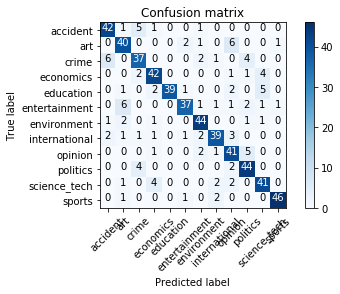

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier(n_estimators = 58 , criterion = 'entropy' , random_state = 0)
clf_rand.fit(tfidf_train, y_train)
pred_rand = clf_rand.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred_rand)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_tree, labels=classes)
plot_confusion_matrix(cm, classes=classes)

In [17]:
from sklearn.ensemble import RandomForestClassifier
num_tree = []
acc = []
for i in range(26,70,2):
    clf = RandomForestClassifier(n_estimators = i , criterion = 'entropy' , random_state = 0)
    clf.fit(tfidf_train, y_train)
    pred = clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    print("for number of trees=" , i , "  accuracy:   %0.3f" % score)
    num_tree.append(i)
    acc.append(score)

for number of trees= 26   accuracy:   0.700
for number of trees= 28   accuracy:   0.702
for number of trees= 30   accuracy:   0.700
for number of trees= 32   accuracy:   0.723
for number of trees= 34   accuracy:   0.720
for number of trees= 36   accuracy:   0.722
for number of trees= 38   accuracy:   0.718
for number of trees= 40   accuracy:   0.738
for number of trees= 42   accuracy:   0.740
for number of trees= 44   accuracy:   0.738
for number of trees= 46   accuracy:   0.740
for number of trees= 48   accuracy:   0.737
for number of trees= 50   accuracy:   0.743
for number of trees= 52   accuracy:   0.752
for number of trees= 54   accuracy:   0.748
for number of trees= 56   accuracy:   0.745
for number of trees= 58   accuracy:   0.763
for number of trees= 60   accuracy:   0.747
for number of trees= 62   accuracy:   0.747
for number of trees= 64   accuracy:   0.748
for number of trees= 66   accuracy:   0.752
for number of trees= 68   accuracy:   0.757


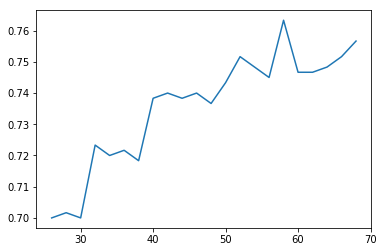

In [18]:
plt.plot(num_tree , acc)
plt.show()

In [16]:
clf_tree_tf = MultinomialNB(alpha=0.1)
last_score = 0
alpha_arr = []
score_arr = []
for alpha in np.arange(0,1.5,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf_tree_tf = nb_classifier
    print("Alpha: {:.2f}  Accuracy: {:.5f}".format(alpha, score))
    alpha_arr.append(alpha)
    score_arr.append(score)

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00  Accuracy: 0.66833
Alpha: 0.10  Accuracy: 0.82000
Alpha: 0.20  Accuracy: 0.81667
Alpha: 0.30  Accuracy: 0.81500
Alpha: 0.40  Accuracy: 0.81333
Alpha: 0.50  Accuracy: 0.80667
Alpha: 0.60  Accuracy: 0.80833
Alpha: 0.70  Accuracy: 0.80667
Alpha: 0.80  Accuracy: 0.80667
Alpha: 0.90  Accuracy: 0.80167
Alpha: 1.00  Accuracy: 0.80167
Alpha: 1.10  Accuracy: 0.80000
Alpha: 1.20  Accuracy: 0.79833
Alpha: 1.30  Accuracy: 0.79833
Alpha: 1.40  Accuracy: 0.79667


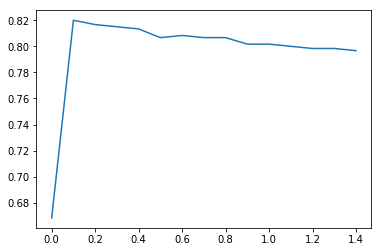

In [17]:
plt.plot(alpha_arr , score_arr)
plt.show()

In [21]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

accuracy:   0.757
Confusion matrix, with only tfidf


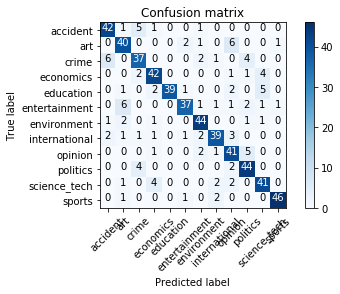

In [24]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth = 7)
clf.fit(tfidf_train , y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_tree, labels=classes)
plot_confusion_matrix(cm, classes=classes)

In [12]:
from sklearn.neural_network import MLPClassifier

Iteration 1, loss = 2.50826416
Iteration 2, loss = 2.50446891
Iteration 3, loss = 2.50109749
Iteration 4, loss = 2.49825381
Iteration 5, loss = 2.49595882
Iteration 6, loss = 2.49411713
Iteration 7, loss = 2.49254601
Iteration 8, loss = 2.49124179
Iteration 9, loss = 2.49025343
Iteration 10, loss = 2.48943452
Iteration 11, loss = 2.48875958
Iteration 12, loss = 2.48817509
Iteration 13, loss = 2.48763461
Iteration 14, loss = 2.48712318
Iteration 15, loss = 2.48668381
Iteration 16, loss = 2.48627592
Iteration 17, loss = 2.48592703
Iteration 18, loss = 2.48558299
Iteration 19, loss = 2.48526336
Iteration 20, loss = 2.48499485
accuracy:   0.083
Confusion matrix, with only tfidf


C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


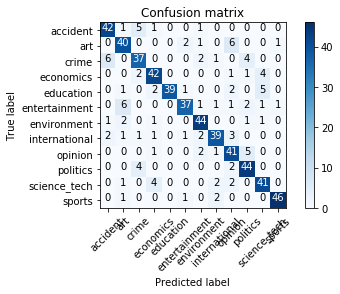

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(80,150,80), max_iter=20, alpha=0.0001,
                    solver='sgd', verbose=3,  random_state=21,tol=0.000000001)
clf.fit(tfidf_train , y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_tree, labels=classes)
plot_confusion_matrix(cm, classes=classes)